# Data Augmentation in keras

data augmentation occurs when you create new data based on existing data. in our case data will be images. data augmentation on images will include transformations like:
1. Flipping the image horizontally or vertically
2. Rotating the image
3. Zooming in or out of the image
4. cropping the image
5. varying the color of the image

In [17]:
# importing the dependencies
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc,ndimage
import keras
import cv2
from keras import backend as k
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [75]:
# plot images with data on jupyter notebook
def plots(ims,figsize=(12,6),rows=1,interp= False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize = figsize)
    cols = len(ims)//rows if len(ims)%2 ==0 else len(ims)//rows +1
    for i in range(len(ims)):
        sp=f.add_subplot(rows,cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[1], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [76]:
# configuring the image generator
gen = ImageDataGenerator(rotation_range= 10, width_shift_range =.1,
                        height_shift_range= .1, shear_range= .15,
                        zoom_range=.1,channel_shift_range=10., horizontal_flip= True)


In [77]:
# image path 
imagePath = 'cat.jpg'

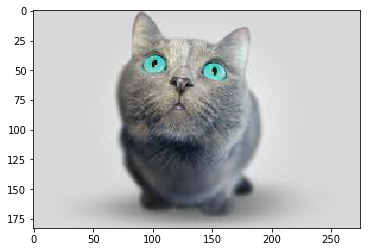

In [78]:
# now get the image
image = np.expand_dims(cv2.imread(imagePath),0)
plt.imshow(image[0])

In [79]:
images = gen.flow(image)

In [80]:
# to get 10 samples of augmened images
aug_images = [next(images)[0].astype(np.uint8) for i in range(10)]

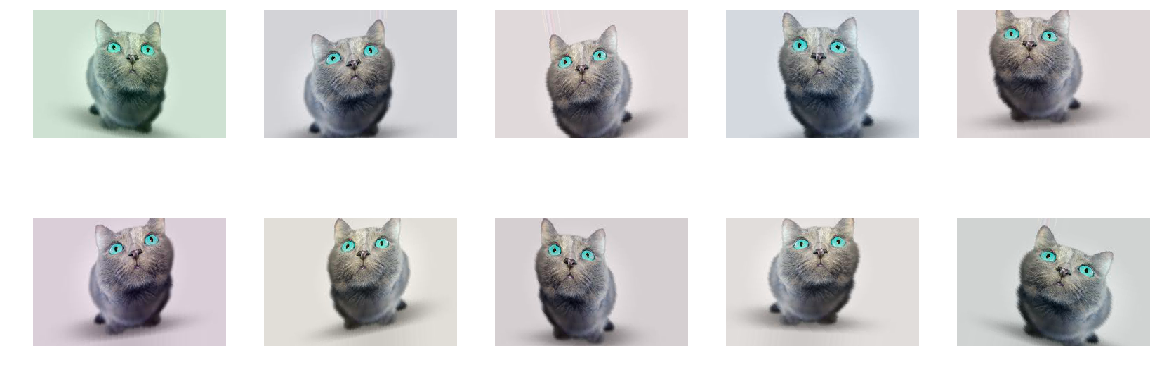

In [81]:
# printing the augmented images
plots(aug_images, figsize=(20,7), rows=2)